In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
def tratando_dados(filename):
    dataset = pd.read_csv(filename,delimiter='\t')
    return dataset

In [3]:
#Carregando os dados e preenchendo campos vazios
dataset = tratando_dados("BRAZIL_CITIES.csv")
Y = pd.DataFrame(dataset, columns = ["GVA_AGROPEC", "GVA_INDUSTRY","GVA_SERVICES","GVA_PUBLIC"])
dataset = dataset.drop(["GVA_AGROPEC"], axis=1)
dataset = dataset.drop(["GVA_INDUSTRY"], axis=1)
datset = dataset.drop(["GVA_SERVICES"], axis=1)
dataset = dataset.drop(["GVA_PUBLIC"], axis=1)
dataset = dataset.drop([" GVA_TOTAL "], axis=1)
Cidades = pd.DataFrame(dataset["CITY"])
dataset = dataset.drop(["CITY"], axis=1)
X = pd.DataFrame(dataset)
X = X.fillna(0.0)
X = X.astype(float)
Y["GVA_AGROPEC"] = Y["GVA_AGROPEC"].astype(float)
Y["GVA_AGROPEC"] = Y["GVA_AGROPEC"].astype(float)
Y["GVA_SERVICES"] = Y["GVA_SERVICES"].astype(float)
Y["GVA_PUBLIC"] = Y["GVA_PUBLIC"].astype(float)
print(X)
X_frame = X.copy()
Y_frame = Y.copy()

      CAPITAL     PAY_TV  FIXED_PHONES  GVA_SERVICES  COMP_A  COMP_B   COMP_C  \
0         1.0  2047668.0     5543127.0  4.646570e+08   739.0    79.0  31566.0   
1         0.0    98664.0      231302.0  5.311143e+07    11.0     2.0    863.0   
2         1.0  1271672.0     2417123.0  1.773611e+08   172.0   274.0   6824.0   
3         1.0   460682.0      920410.0  1.038195e+08   242.0    42.0   3269.0   
4         1.0   352371.0      663846.0  4.893041e+07   196.0    31.0   3482.0   
5         1.0   474416.0     1137695.0  5.321312e+07   226.0   139.0   5221.0   
6         0.0    57271.0      191288.0  2.811320e+07    14.0     7.0    711.0   
7         1.0   128345.0      397327.0  2.962862e+07    84.0    17.0   2059.0   
8         0.0   134816.0      217623.0  1.512321e+07    39.0    10.0    491.0   
9         1.0   333275.0      918158.0  4.624918e+07   227.0    34.0   6025.0   
10        1.0   220223.0      619546.0  3.738101e+07    83.0    27.0   2172.0   
11        0.0   237013.0    

In [4]:
#Normalizando as features dos dados do treino
colums = (X.columns[0])
max= [X[c].max() for c in X.columns] 
min= [X[c].min() for c in X.columns]
i=0
for c in X.columns:
    while(i<len(X.columns)): 
        X[c]=(X[c]-min[i])/(max[i]-min[i])#Novo dado sera o antigo menos o menor de todos os dados dividido pela subtracao do maior pelo menor
        i=i+1
        break
arr = X.values
X_train=[]
a=X.shape
for i in range(a[0]):                      
    X.append((arr[i]).tolist())
print(X)

      CAPITAL    PAY_TV  FIXED_PHONES  GVA_SERVICES    COMP_A    COMP_B  \
0         1.0  1.000000      1.000000  1.000000e+00  0.379363  0.288321   
1         0.0  0.048180      0.041725  1.143024e-01  0.005647  0.007299   
2         1.0  0.621033      0.436056  3.817033e-01  0.088296  1.000000   
3         1.0  0.224976      0.166043  2.234325e-01  0.124230  0.153285   
4         1.0  0.172081      0.119758  1.053043e-01  0.100616  0.113139   
5         1.0  0.231683      0.205242  1.145213e-01  0.116016  0.507299   
6         0.0  0.027966      0.034506  6.050311e-02  0.007187  0.025547   
7         1.0  0.062675      0.071677  6.376447e-02  0.043121  0.062044   
8         0.0  0.065836      0.039257  3.254702e-02  0.020021  0.036496   
9         1.0  0.162755      0.165637  9.953400e-02  0.116530  0.124088   
10        1.0  0.107545      0.111766  8.044860e-02  0.042608  0.098540   
11        0.0  0.115745      0.089680  7.297679e-02  0.093943  0.032847   
12        0.0  0.064587  

In [5]:
#Normalizando os labels MinMAX normalizador
colums = (Y.columns[0])
max= [Y[c].max() for c in Y.columns] 
min= [Y[c].min() for c in Y.columns]
i=0
for c in Y.columns:
    while(i<len(Y.columns)): 
        Y[c]=(Y[c]-min[i])/(max[i]-min[i])#Novo dado sera o antigo menos o menor de todos os dados dividido pela subtracao do maior pelo menor
        i=i+1
        break
arr = Y.values
Y_train=[]
a=Y.shape
for i in range(a[0]):                      
    Y.append((arr[i]).tolist())
print(Y)

      GVA_AGROPEC  GVA_INDUSTRY  GVA_SERVICES    GVA_PUBLIC
0        0.031283  1.000000e+00  1.000000e+00  1.000000e+00
1        0.000675  4.793185e-05  1.143024e-01  6.270618e-02
2        0.000058  5.739424e-01  3.817033e-01  1.134554e-03
3        0.585299  1.525879e-01  2.234325e-01  2.196607e-03
4        0.020220  1.069093e-01  1.053043e-01  1.601889e-01
5        0.001640  1.879986e-01  1.145213e-01  2.545121e-01
6        0.000225  6.651597e-05  6.050311e-02  4.169676e-02
7        0.024722  9.366625e-02  6.376447e-02  1.466130e-01
8        0.002506  3.060846e-02  3.254702e-02  5.292121e-02
9        0.007992  2.022347e-01  9.953400e-02  2.103244e-01
10       0.033964  1.260597e-01  8.044860e-02  1.880554e-01
11       0.084534  1.626629e-01  7.297679e-02  1.064062e-01
12       0.085649  6.241118e-02  4.352646e-02  6.486936e-02
13       0.396991  9.900390e-02  3.229302e-02  6.400521e-02
14       0.205911  4.152438e-02  9.254827e-06  2.802117e-02
15       0.033780  1.431185e-01  7.53423

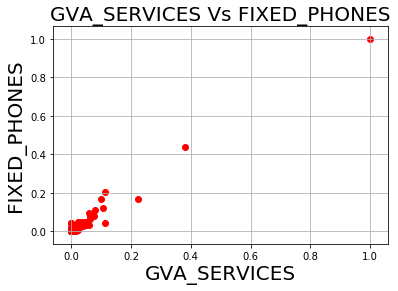

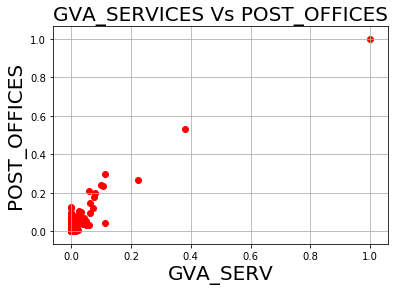

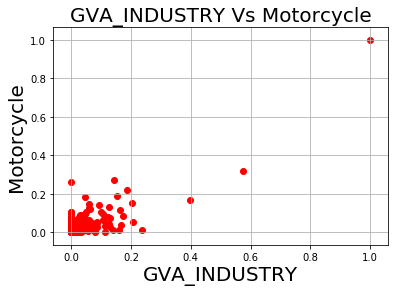

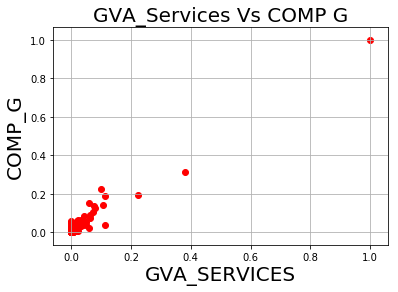

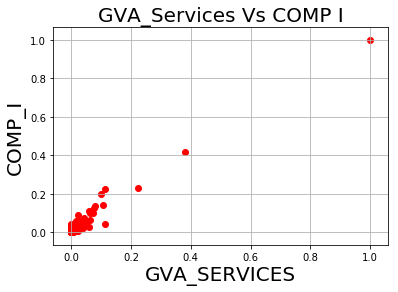

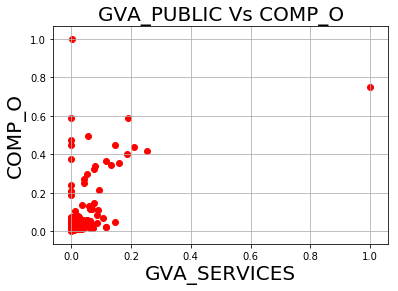

In [6]:
#PERFEITO
plt.scatter(Y['GVA_SERVICES'],X['FIXED_PHONES'], color='red')
plt.title('GVA_SERVICES Vs FIXED_PHONES', fontsize=20)
plt.xlabel('GVA_SERVICES', fontsize=20)
plt.ylabel('FIXED_PHONES', fontsize=20)
plt.grid(True)
plt.show()

#PERFEITO
plt.scatter(Y['GVA_SERVICES'],X['POST_OFFICES'], color='red')
plt.title('GVA_SERVICES Vs POST_OFFICES', fontsize=20)
plt.xlabel('GVA_SERV', fontsize=20)
plt.ylabel('POST_OFFICES', fontsize=20)
plt.grid(True)
plt.show()

#PERFEITO
plt.scatter(Y['GVA_INDUSTRY'],X['Motorcycles'], color='red')
plt.title('GVA_INDUSTRY Vs Motorcycle', fontsize=20)
plt.xlabel('GVA_INDUSTRY', fontsize=20)
plt.ylabel('Motorcycle', fontsize=20)
plt.grid(True)
plt.show()

#PERFEITO
plt.scatter(Y['GVA_SERVICES'],X['COMP_G'], color='red')
plt.title('GVA_Services Vs COMP G', fontsize=20)
plt.xlabel('GVA_SERVICES', fontsize=20)
plt.ylabel('COMP_G', fontsize=20)
plt.grid(True)
plt.show()

#PERFEITO
plt.scatter(Y['GVA_SERVICES'],X['COMP_I'], color='red')
plt.title('GVA_Services Vs COMP I', fontsize=20)
plt.xlabel('GVA_SERVICES', fontsize=20)
plt.ylabel('COMP_I', fontsize=20)
plt.grid(True)
plt.show()

#PERFEITO
plt.scatter(Y['GVA_PUBLIC'],X['COMP_O'], color='red')
plt.title('GVA_PUBLIC Vs COMP_O', fontsize=20)
plt.xlabel('GVA_SERVICES', fontsize=20)
plt.ylabel('COMP_O', fontsize=20)
plt.grid(True)
plt.show()

In [7]:
#Separando em treino e teste
Y_frame = Y.copy()
X_frame = X.copy()
X = np.array(X)
Y = np.array(Y)
train_ratio = int(0.8*X.shape[0])
test_ratio = int(0.2*X.shape[0])
indices = np.random.choice(range(int(X.shape[0])),size=test_ratio,replace=False)
X_train = []
Y_train = []
X_test = []
Y_test = []
for i in range(X.shape[0]):
    if i in indices:
        X_test.append(X[i])
        Y_test.append(Y[i])
    else :
        if i not in indices:
            X_train.append(X[i])
            Y_train.append(Y[i])
print("Tamanho arquivo features teste: "+str(len(X_test)))
print("Tamanho arquivo labels teste: "+str(len(Y_test)))
print("Tamanho arquivo features treino: "+str(len(X_train)))
print("Tamanho arquivo labels treino: "+str(len(Y_train)))
print(type(X_test))

Tamanho arquivo features teste: 669
Tamanho arquivo labels teste: 669
Tamanho arquivo features treino: 2676
Tamanho arquivo labels treino: 2676
<type 'list'>


In [8]:
arr = Y_train
Y1 = []
Y2 = []
Y3 = []
Y4 = []
a= len(Y_train)
for i in range(a):                      
    Y1.append((arr[i][0]).tolist())
    Y2.append((arr[i][1]).tolist())
    Y3.append((arr[i][2]).tolist())
    Y4.append((arr[i][3]).tolist())
print(Y1)

[0.031282628286543566, 0.0006754418338831977, 5.802684026254888e-05, 0.585299244814583, 0.02022031073333739, 0.0002251472779610659, 0.024722493250662666, 0.0025058795052302274, 0.007991672945182193, 0.03396416431498223, 0.08453379612751388, 0.39699085229005737, 0.20591054249419183, 0.03377950104490743, 2.6064655420869623e-05, 0.46097656483687144, 0.0058006587561756735, 0.02868586835212495, 0.000722108620497198, 0.1512852431669402, 0.027960201246523778, 0.012593649932537468, 0.0930991339538661, 0.00024440873741161825, 0.17533261548918996, 0.027522222329428418, 1.6772659247574653e-05, 1.2222932802016563e-05, 0.04353710253067409, 3.534952036149131e-05, 0.06945307175030564, 0.22029671333395245, 0.9230684758575433, 0.11744434933994842, 0.00031876610049599787, 4.620325649023648e-05, 0.032087865686313284, 0.06310578261602438, 0.039500232945280885, 0.010295774221921721, 0.1801889992021648, 0.001711410266797171, 0.02608327506937958, 0.02522941692524338, 0.2795926562879705, 1.218014540597683e-05

In [9]:
m=np.ones((2676,1))
b=np.matrix(X_train)
b=np.concatenate((m,b),axis=1)     
d=b.T
e=np.linalg.inv(np.matmul(d,b))
Y1=np.matrix(Y1)
Y1=Y1.T
Y2=np.matrix(Y2)
Y2=Y2.T
Y3=np.matrix(Y3)
Y3=Y3.T
Y4=np.matrix(Y4)
Y4=Y4.T
f=np.matmul(e,d)
c1=np.matmul(f,Y1)
c2=np.matmul(f,Y2)
c3=np.matmul(f,Y3)
c4=np.matmul(f,Y4)

In [18]:
#Predições:
x_test=[1,]
test = X_test[0]
for j in test:
    x_test.append(float(j))
x_test=np.matrix(x_test)
x_test = x_test.T
Y1=np.matmul(c1.T,x_test)
Y2=np.matmul(c2.T,x_test)
Y3=np.matmul(c3.T,x_test)
Y4=np.matmul(c4.T,x_test)
print("AGROPEC valor predito : "+str(Y1))
print("INDUSTRY valor predito : "+str(Y2))
print("SERVICES valor predito : "+str(Y3))
print("PUBLIC valor predito : "+str(Y4))
print("AGROPEC valor correto : "+str(Y_test[0][0]))
print("INDUSTRY valor correto : "+str(Y_test[0][1]))
print("SERVICES valor correto : "+str(Y_test[0][2]))
print("PUBLIC valor correto : "+str(Y_test[0][3]))

AGROPEC valor predito : [[-0.93898767]]
INDUSTRY valor predito : [[ 0.353767]]
SERVICES valor predito : [[ 0.11452128]]
PUBLIC valor predito : [[ 0.23447896]]
AGROPEC valor correto : 0.00164024056472
INDUSTRY valor correto : 0.187998644029
SERVICES valor correto : 0.114521280638
PUBLIC valor correto : 0.254512058846


In [ ]:
#MODELO NAO LINEAR REDE NEURAL


In [ ]:
######################################Comite AdaBoost################################3
n_estimators_list = [1, 3, 10, 20]

for i, n_estimators in enumerate(n_estimators_list):
    
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                               n_estimators=n_estimators, random_state=12345)

    model.fit(x_train, y_train) 
    
    train_error = np.round(100*np.mean(y_train != model.predict(x_train)), 2)
    test_error = np.round(100*np.mean(y_test != model.predict(x_test)), 2)
   
    axs.flatten()[i].set_xlim(xlim)
    axs.flatten()[i].set_ylim(ylim)
    for j, label in enumerate(labels):
        axs.flatten()[i].scatter(x[y == label,0], x[y == label,1],
                        s=5*com.markersize, marker='o', color=colors[j])  
    xx, yy = com.make_meshgrid(x[:,0], x[:,1])
    com.plot_contours(axs.flatten()[i], model,
                      lambda x, model: model.predict(x),
                      xx, yy, colors)
    axs.flatten()[i].set_title("$N_c$ = " + str(n_estimators) + 
                               ", train error = " + str(train_error) + "%, \n" +
                               "test error = " + str(test_error) + "%")